# Actividad 3.5 Los algoritmos de KNN y Market Basket

In [1]:
## Librerias utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Problema 1

In [2]:
DFWine = pd.read_csv("wine-clustering.csv")
DFWine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [3]:
DFWine_arr = np.asanyarray(DFWine)
#DFWine_arr = round(DFWine_arr[,2])
DFWine_arr

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

### 1. Definición de número de vecinos y visualización

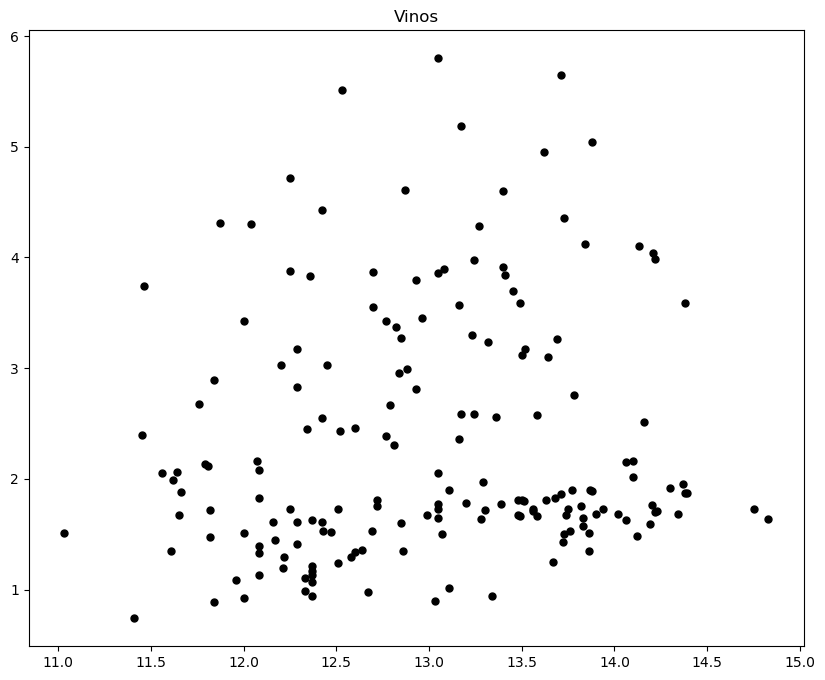

In [4]:
knn = 5
valor_comp = [14, 2, 2.5, 16, 115, 3, 2.5, 0.4, 2, 9, 1, 3.5, 800]

plt.figure(figsize = (10,8))
plt.title("Vinos")
plt.scatter(DFWine_arr[:, 0], DFWine_arr[:,1], marker = "o", s = 25, color = "black")

### 2. Ejecución del algoritmo e impresión de los vecinos cercanos

In [5]:
knn_model = NearestNeighbors(n_neighbors = knn, algorithm = "auto").fit(DFWine_arr)
distances, indices = knn_model.kneighbors([valor_comp])

print("Vinos más similares: ")
for rank, index in enumerate(indices[0][:knn], start = 1):
    print(str(rank) + " is", DFWine_arr[index])

Vinos más similares: 
1 is [1.356e+01 1.710e+00 2.310e+00 1.620e+01 1.170e+02 3.150e+00 3.290e+00
 3.400e-01 2.340e+00 6.130e+00 9.500e-01 3.380e+00 7.950e+02]
2 is [1.406e+01 1.630e+00 2.280e+00 1.600e+01 1.260e+02 3.000e+00 3.170e+00
 2.400e-01 2.100e+00 5.650e+00 1.090e+00 3.710e+00 7.800e+02]
3 is [1.305e+01 2.050e+00 3.220e+00 2.500e+01 1.240e+02 2.630e+00 2.680e+00
 4.700e-01 1.920e+00 3.580e+00 1.130e+00 3.200e+00 8.300e+02]
4 is [1.293e+01 3.800e+00 2.650e+00 1.860e+01 1.020e+02 2.410e+00 2.410e+00
 2.500e-01 1.980e+00 4.500e+00 1.030e+00 3.520e+00 7.700e+02]
5 is [1.336e+01 2.560e+00 2.350e+00 2.000e+01 8.900e+01 1.400e+00 5.000e-01
 3.700e-01 6.400e-01 5.600e+00 7.000e-01 2.470e+00 7.800e+02]


In [6]:
## Redondear cantidades de los resultados e impresión 

vino1 = [1.356e+01, 1.710e+00, 2.310e+00, 1.620e+01, 1.170e+02, 3.150e+00, 3.290e+00,
 3.400e-01, 2.340e+00, 6.130e+00, 9.500e-01, 3.380e+00, 7.950e+02]
for i in vino1:
    round(i, 2)

vino2 = [1.406e+01, 1.630e+00, 2.280e+00, 1.600e+01, 1.260e+02, 3.000e+00, 3.170e+00,
 2.400e-01, 2.100e+00, 5.650e+00, 1.090e+00, 3.710e+00, 7.800e+02]
for i in vino2:
    round(i, 2)

vino3 = [1.305e+01, 2.050e+00, 3.220e+00, 2.500e+01, 1.240e+02, 2.630e+00, 2.680e+00,
 4.700e-01, 1.920e+00, 3.580e+00, 1.130e+00, 3.200e+00, 8.300e+02]
for i in vino3:
    round(i, 2)

vino4 = [1.293e+01, 3.800e+00, 2.650e+00, 1.860e+01, 1.020e+02, 2.410e+00, 2.410e+00,
 2.500e-01, 1.980e+00, 4.500e+00, 1.030e+00, 3.520e+00, 7.700e+02]
for i in vino4:
    round(i, 2)

vino5 = [1.336e+01, 2.560e+00, 2.350e+00, 2.000e+01, 8.900e+01, 1.400e+00, 5.000e-01,
 3.700e-01, 6.400e-01, 5.600e+00, 7.000e-01, 2.470e+00, 7.800e+02]
for i in vino5:
    round(i, 2)

print("Vinos más similares") 
print("Características del primer vino", vino1)
print("Características del segundo vino", vino2)
print("Características del tercer vino", vino3)
print("Características del cuarto vino", vino4)
print("Características del quinto vino", vino5)

Alcohol = [13.56, 14.06, 13.05, 12.93, 13.36]
print("Promedio de concentración de alcohol de los 5 vinos: ", sum(Alcohol) / 5)

Vinos más similares
Características del primer vino [13.56, 1.71, 2.31, 16.2, 117.0, 3.15, 3.29, 0.34, 2.34, 6.13, 0.95, 3.38, 795.0]
Características del segundo vino [14.06, 1.63, 2.28, 16.0, 126.0, 3.0, 3.17, 0.24, 2.1, 5.65, 1.09, 3.71, 780.0]
Características del tercer vino [13.05, 2.05, 3.22, 25.0, 124.0, 2.63, 2.68, 0.47, 1.92, 3.58, 1.13, 3.2, 830.0]
Características del cuarto vino [12.93, 3.8, 2.65, 18.6, 102.0, 2.41, 2.41, 0.25, 1.98, 4.5, 1.03, 3.52, 770.0]
Características del quinto vino [13.36, 2.56, 2.35, 20.0, 89.0, 1.4, 0.5, 0.37, 0.64, 5.6, 0.7, 2.47, 780.0]
Promedio de concentración de alcohol de los 5 vinos:  13.392000000000001


<function matplotlib.pyplot.show(close=None, block=None)>

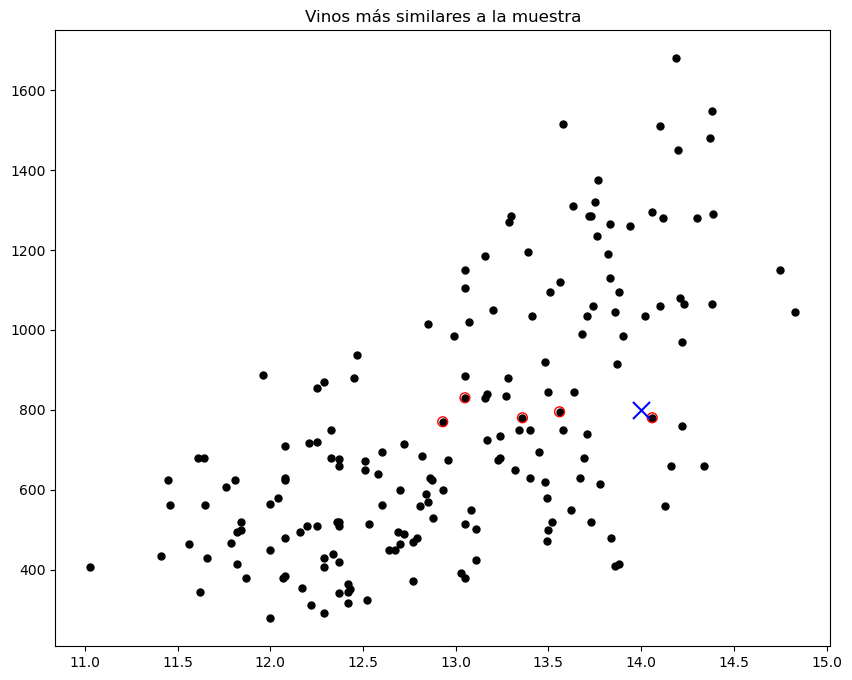

In [7]:
plt.figure(figsize = (10,8))
plt.title("Vinos más similares a la muestra")
plt.scatter(DFWine_arr[:,0], DFWine_arr[:,12], marker = "o", s = 25, color = "black")
plt.scatter(DFWine_arr[indices][0][:][:,0], DFWine_arr[indices][0][:][:,12], marker = "o", s = 50, color = "red", facecolors = "none")
plt.scatter(valor_comp[0], valor_comp[12], marker = "x", s = 150, color = "blue")
plt.show

## Problema 2

In [8]:
my_basket = [["bread", "butter", "wine", "bananas", "coffee", "carrots"],
             ["tomatoes", "onions", "cheese", "milk", "potatoes"],
             ["beer", "chips", "asparagus", "salsa", "milk", "apples"],
             ["olive oil", "bread", "butter", "tomatoes", "steak", "carrots"],
             ["tomatoes", "onions", "chips", "wine", "ketchup", "orange"],
             ["bread", "butter", "beer", "chips", "milk"],
             ["butter", "tomatoes", "carrots", "coffee", "sugar"],
             ["tomatoes", "onions", "cheese", "milk", "potatoes"],
             ["bread", "butter", "ketchup", "coffee", "chicken wings"],
             ["butter", "beer", "chips", "asparagus", "apples"],
             ["tomatoes", "onion", "beer", "chips", "milk", "coffee"]]

### 1. Creación del dataframe de trabajo

In [9]:
Customers = pd.DataFrame(my_basket)
articulos = ["bread", "butter", "wine", "bananas", "coffee", "carrots", "tomatoes", "onions", "cheese", "milk", "potatoes",
             "beer", "chips", "asparagus", "salsa", "apples", "olive oil", "steak", "ketchup", "orange", "sugar", "chicken wings"]


In [10]:
my_basket
No1 = []
No2 = []
No3 = []
No4 = []
No5 = []
No6 = []
No7 = []
No8 = []
No9 = []
No10 = []
No11 = []

lista1 = []
lista2 = []
lista3 = []
lista4 = []
lista5 = []
lista6 = []
lista7 = []
lista8 = []
lista9 = []
lista10 = []
lista11 = []

lista_final = []


##for i in my_basket[:]:
for i in articulos:
    if i in my_basket[0] not in articulos:
        No1.append(1)
    else:
        No1.append(0)
lista_final.append(No1)
    
for i in articulos:
    if i in my_basket[1] not in articulos:
        No2.append(1)
    else:
        No2.append(0)
lista_final.append(No2)

for i in articulos:
    if i in my_basket[2] not in articulos:
        No3.append(1)
    else:
        No3.append(0)
lista_final.append(No3)

for i in articulos:
    if i in my_basket[3] not in articulos:
        No4.append(1)
    else:
        No4.append(0)
lista_final.append(No4)
    
for i in articulos:
    if i in my_basket[4] not in articulos:
        No5.append(1)
    else:
        No5.append(0)
lista_final.append(No5)

for i in articulos:
    if i in my_basket[5] not in articulos:
        No6.append(1)
    else:
        No6.append(0)
lista_final.append(No6)

for i in articulos:
    if i in my_basket[6] not in articulos:
        No7.append(1)
    else:
        No7.append(0)
lista_final.append(No7)
    
for i in articulos:
    if i in my_basket[7] not in articulos:
        No8.append(1)
    else:
        No8.append(0)
lista_final.append(No8)

for i in articulos:
    if i in my_basket[8] not in articulos:
        No9.append(1)
    else:
        No9.append(0)
lista_final.append(No9)

for i in articulos:
    if i in my_basket[9] not in articulos:
        No10.append(1)
    else:
        No10.append(0)
lista_final.append(No10)
    
for i in articulos:
    if i in my_basket[10] not in articulos:
        No11.append(1)
    else:
        No11.append(0)
lista_final.append(No11)

print(lista_final)
        
#df_final = pd.DataFrame(lista_final, columns = ["bread", "butter", "wine", "bananas", "coffee", "carrots", "tomatoes", "onions", "cheese", "milk", "potatoes",
             #"beer", "chips", "asparagus", "salsa", "apples", "olive oil", "steak", "ketchup", "orange", "sugar", "chicken wings"])


[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [11]:
df_compr = pd.DataFrame(data = lista_final, columns = ["bread", "butter", "wine", "bananas", "coffee", "carrots", "tomatoes", "onions", "cheese", "milk", "potatoes",
             "beer", "chips", "asparagus", "salsa", "apples", "olive oil", "steak", "ketchup", "orange", "sugar", "chicken wings"])
df_compr

,bread,butter,wine,bananas,coffee,carrots,tomatoes,onions,cheese,milk,potatoes,beer,chips,asparagus,salsa,apples,olive oil,steak,ketchup,orange,sugar,chicken wings
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0
3,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
5,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0


In [12]:
# Filtrado de transacciones de más de un artículo
basket_filt = df_compr[(df_compr > 0).sum(axis=1) >=2]
basket_filt

,bread,butter,wine,bananas,coffee,carrots,tomatoes,onions,cheese,milk,potatoes,beer,chips,asparagus,salsa,apples,olive oil,steak,ketchup,orange,sugar,chicken wings
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0
3,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
5,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0


In [13]:
# Aplicación del algoritmo "A priori" para localizar artículos frecuentemente comprados

from mlxtend.frequent_patterns import apriori

articulos_frecuentes = apriori(basket_filt, min_support=0.25, 
                              use_colnames = True).sort_values("support", ascending = False).reset_index(drop=True)

articulos_frecuentes["lenght"] = articulos_frecuentes["itemsets"].apply(lambda x:len(x))
articulos_frecuentes

C:\Users\Usuario\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,lenght
0,0.545455,(butter),1
1,0.545455,(tomatoes),1
2,0.454545,(chips),1
3,0.454545,(milk),1
4,0.363636,(bread),1
5,0.363636,(beer),1
6,0.363636,"(beer, chips)",2
7,0.363636,"(butter, bread)",2
8,0.363636,(coffee),1
9,0.272727,(onions),1


In [14]:
# Establecer reglas de asociación
from mlxtend.frequent_patterns import association_rules

association_rules(articulos_frecuentes, metric = "confidence", 
                  min_threshold = 0.5).sort_values("confidence", ascending = False).reset_index(drop=True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beer),(chips),0.363636,0.454545,0.363636,1.000000,2.200000,0.198347,inf,0.857143
1,(bread),(butter),0.363636,0.545455,0.363636,1.000000,1.833333,0.165289,inf,0.714286
2,(carrots),(butter),0.272727,0.545455,0.272727,1.000000,1.833333,0.123967,inf,0.625000
3,"(chips, milk)",(beer),0.272727,0.363636,0.272727,1.000000,2.750000,0.173554,inf,0.875000
4,(onions),(tomatoes),0.272727,0.545455,0.272727,1.000000,1.833333,0.123967,inf,0.625000
5,"(beer, milk)",(chips),0.272727,0.454545,0.272727,1.000000,2.200000,0.148760,inf,0.750000
6,(chips),(beer),0.454545,0.363636,0.363636,0.800000,2.200000,0.198347,3.181818,1.000000
7,(coffee),(butter),0.363636,0.545455,0.272727,0.750000,1.375000,0.074380,1.818182,0.428571
8,(beer),"(chips, milk)",0.363636,0.272727,0.272727,0.750000,2.750000,0.173554,2.909091,1.000000
9,(beer),(milk),0.363636,0.454545,0.272727,0.750000,1.650000,0.107438,2.181818,0.619048


In [15]:
# Criterio lift (Mayor número = Mayor correlación entre artículos)

association_rules(articulos_frecuentes, metric = "lift", 
                  min_threshold = 1.80).sort_values("lift", ascending = False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(chips, milk)",(beer),0.272727,0.363636,0.272727,1.000000,2.750000,0.173554,inf,0.875000
1,(beer),"(chips, milk)",0.363636,0.272727,0.272727,0.750000,2.750000,0.173554,2.909091,1.000000
2,(beer),(chips),0.363636,0.454545,0.363636,1.000000,2.200000,0.198347,inf,0.857143
3,(chips),(beer),0.454545,0.363636,0.363636,0.800000,2.200000,0.198347,3.181818,1.000000
4,"(beer, milk)",(chips),0.272727,0.454545,0.272727,1.000000,2.200000,0.148760,inf,0.750000
5,(chips),"(beer, milk)",0.454545,0.272727,0.272727,0.600000,2.200000,0.148760,1.818182,1.000000
6,(butter),(bread),0.545455,0.363636,0.363636,0.666667,1.833333,0.165289,1.909091,1.000000
7,(bread),(butter),0.363636,0.545455,0.363636,1.000000,1.833333,0.165289,inf,0.714286
8,(butter),(carrots),0.545455,0.272727,0.272727,0.500000,1.833333,0.123967,1.454545,1.000000
9,(carrots),(butter),0.272727,0.545455,0.272727,1.000000,1.833333,0.123967,inf,0.625000


## Conclusión
Al momento de hacer el algoritmo apriori se tomó un valor de soporte mínimo de 0.25, para poder delimitar correctamente los artículos más frecuentemente comprados. Después se procedió a hacer las reglas de asociación con un valor de confidencialidad de 0.5, lo que arrojó como resultado que los articulo más comprados juntos son papas fritas y cerveza, seguido de pan y mantequilla y cebollas con tomates.

Al reacomodar y tomar el valor de lift para conocer la correlación, podemos corroborar que existe una alta correlación entre la cerveza y las papás e incluso agregando que se compra leche a la par, seguido de una alta correlación entre mantequilla y pan, mantequilla y zahahorias y jitomates con cebolla, siendo estas las compras que más se repiten.